In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
# import xgboost as xg
from sklearn.metrics import explained_variance_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVR

# 5일자 데이터 불러오기

In [2]:
path = "C:/Users/CPB06GameN/내 주피터노트북"
file = ["2015-08-07","2015-08-08","2015-09-03","2015-09-09","2015-09-11"]
dfs = []
for i in range(5):
    filenames = glob.glob(path + "/" + file[i] + "/*.txt")
    cols = []
    for filename in filenames:
        cols.append(pd.read_csv(filename, index_col=None, header=None))
    df = pd.DataFrame(pd.concat(cols, axis=1, ignore_index=None))
    df.columns = ['AIRGAP1' , 'AIRGAP2' , 'AIRGAP3' , 'AIRGAP4' , 'CURRENT_DEPTH1' ,
              'CURRENT_DEPTH2' , 'CURRENT_DEPTH3' , 'CURRENT_DEPTH4' , 'CURRENT_DEPTH5' ,
              'CURRENT_DEPTH6' , 'CURRENT_DEPTH7' , 'CURRENT_DIRECTION1' , 'CURRENT_DIRECTION2' , 
              'CURRENT_DIRECTION3' , 'CURRENT_DIRECTION4' , 'CURRENT_DIRECTION5' , 'CURRENT_DIRECTION6' , 
              'CURRENT_DIRECTION7' , 'CURRENT_SPEED1' , 'CURRENT_SPEED2' , 'CURRENT_SPEED3' , 'CURRENT_SPEED4' ,
              'CURRENT_SPEED5' , 'CURRENT_SPEED6' , 'CURRENT_SPEED7' , 'MOORING1_LENGTH',  'MOORING1_TENSION1' ,
              'MOORING1_TENSION2' , 'MOORING2_LENGTH' , 'MOORING2_TENSION1' , 'MOORING2_TENSION2' ,
              'MOORING3_LENGTH' , 'MOORING3_TENSION1' , 'MOORING3_TENSION2' , 'MOORING4_LENGTH' ,
              'MOORING4_TENSION1' , 'MOORING4_TENSION2' , 'MOORING5_LENGTH' , 'MOORING5_TENSION1' ,
              'MOORING5_TENSION2' , 'MOORING6_LENGTH' , 'MOORING6_TENSION1' , 'MOORING6_TENSION2' ,
              'MOORING7_LENGTH' , 'MOORING7_TENSION1' , 'MOORING7_TENSION2' , 'MOORING8_LENGTH' , 
              'MOORING8_TENSION1' , 'MOORING8_TENSION2' , 'MOORING9_LENGTH' , 'MOORING9_TENSION1' ,
              'MOORING9_TENSION2' , 'MOTION_TILTX' , 'MOTION_TILTY' , 'MOTION_YAW' , 'POSITION_X' ,
              'POSITION_Y' , 'WIND1_DIRECTION' , 'WIND1_SPEED' , 'WIND2_DIRECTION' , 'WIND2_SPEED']
    df = df.drop(['CURRENT_DEPTH1' , 'CURRENT_DEPTH2' , 'CURRENT_DEPTH3' , 'CURRENT_DEPTH4' ,
                'CURRENT_DEPTH5' , 'CURRENT_DEPTH6' , 'CURRENT_DEPTH7','MOORING1_LENGTH','MOORING2_LENGTH','MOORING3_LENGTH','MOORING4_LENGTH','MOORING5_LENGTH','MOORING6_LENGTH','MOORING7_LENGTH','MOORING8_LENGTH','MOORING9_LENGTH'],axis=1)
    dfs.append(df)
df1 = dfs[0]
df2 = dfs[1]
df3 = dfs[2]
df4 = dfs[3]
df5 = dfs[4]

# train test 4:1 비율 분할

In [3]:
df4 = df4.drop(['MOORING1_TENSION2','MOORING2_TENSION1','MOORING2_TENSION2','MOORING3_TENSION1','MOORING3_TENSION2','MOORING4_TENSION1','MOORING4_TENSION2','MOORING5_TENSION1','MOORING5_TENSION2','MOORING6_TENSION1','MOORING6_TENSION2','MOORING7_TENSION1','MOORING7_TENSION2','MOORING8_TENSION1','MOORING8_TENSION2','MOORING9_TENSION1','MOORING9_TENSION2'],axis=1)
X = df4.drop(["MOORING1_TENSION1"],axis=1)
y = df4["MOORING1_TENSION1"]
X_train = X.iloc[:69120,]
y_train = y.iloc[:69120,]
X_test = X.iloc[69120:,]
y_test = y.iloc[69120:,]

# max_iter 값 조정 

In [14]:
train = []
test = []
for i in [1,10,100,1000,10000] :
    xg_model = LinearSVR(C= 200, epsilon=0,loss='squared_epsilon_insensitive', max_iter=i, random_state=317)
    xg_model.fit(X_train,y_train)
    r_sq_train = xg_model.score(X_train,y_train)
    r_sq_test = xg_model.score(X_test,y_test)
    train.append(r_sq_train)
    test.append(r_sq_test)

C:\Users\CPB06GameN\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\CPB06GameN\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\CPB06GameN\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\CPB06GameN\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\CPB06GameN\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase

# train test score 백분율화

In [36]:
real_train = []
for i in [0,1,2,3,4]:
    k = train[i]*100
    real_train.append(k)

In [38]:
real_test = []
for i in [0,1,2,3,4]:
    j = test[i]*100
    real_test.append(j)

# linearSVR 모델 성능 시각화

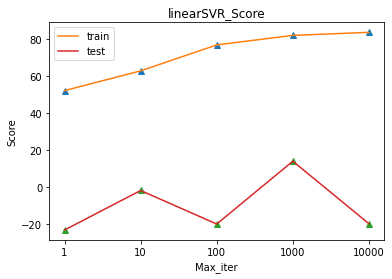

In [65]:
x = [1,10,100,1000,10000]
values = range(len(x))
plt.plot(real_train,"^")
plt.plot(real_train,label="train")
plt.plot(real_test,"^")
plt.plot(real_test,label = "test")
plt.legend()
plt.title('linearSVR_Score')
plt.xticks(values,x)
plt.xlabel("Max_iter")
plt.ylabel("Score")
plt.show()